In [1]:
from pandas import DataFrame, read_csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
matchFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\SoccerSPI\data\external\spi_matches.csv'
matchDF = pd.read_csv(matchFilePath)
matchDF.head(10)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,...,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
7,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
8,2016-08-13,1843,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,...,37.9,44.2,3.0,2.0,1.03,1.84,1.10,2.26,3.12,2.10
9,2016-08-13,2411,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,...,73.0,27.0,2.0,1.0,2.14,1.25,1.81,0.92,2.10,1.05


In [3]:
regDF = matchDF.drop(columns=['date','league_id','league','team1','team2'])
regDF.describe()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,20879.000000,10514.000000,10514.000000,14304.000000,14304.000000,8656.000000,8656.000000,8656.000000,8656.000000,8656.000000,8656.000000
mean,46.565660,46.532621,0.452648,0.291808,0.255543,1.521826,1.143869,30.795311,30.125480,1.537332,1.167086,1.474079,1.120992,1.404032,1.119247,1.551795,1.167246
std,18.620568,18.612862,0.157729,0.141513,0.046817,0.425894,0.417524,25.358560,25.026422,1.282892,1.143750,0.831428,0.717036,0.653623,0.570383,1.256153,1.124703
min,5.230000,4.970000,0.028100,0.000000,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.040000,33.040000,0.353800,0.200100,0.236700,1.240000,0.880000,10.900000,10.500000,1.000000,0.000000,0.850000,0.580000,0.950000,0.720000,1.050000,0.000000
50%,44.250000,44.190000,0.444900,0.275600,0.263500,1.460000,1.090000,26.300000,25.400000,1.000000,1.000000,1.340000,0.990000,1.310000,1.030000,1.050000,1.050000
75%,59.480000,59.405000,0.540050,0.363900,0.284600,1.720000,1.360000,44.600000,43.600000,2.000000,2.000000,1.940000,1.500000,1.740000,1.420000,2.100000,2.100000
max,96.570000,96.780000,0.977500,0.881900,0.453700,4.030000,3.420000,100.000000,100.000000,8.000000,8.000000,7.040000,6.200000,6.580000,5.920000,7.970000,6.760000


In [4]:
regDF.dropna(subset=['score1','score2'],inplace=True)

In [5]:
regDF.fillna(regDF.mean(),inplace=True)
regDF.isna().sum()

spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [6]:
noScoreDF = regDF.drop(columns=['score1','score2'])

In [7]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

team1X_train, team1X_test, team1Y_train, team1Y_test = train_test_split(noScoreDF, regDF.score1, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression

team1Reg = LinearRegression()
team1Reg.fit(team1X_train,team1Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
team1Predict_train = team1Reg.predict(team1X_train)
team1Predict_test = team1Reg.predict(team1X_test)



In [57]:
lfTrainTeam1MSE = round(np.mean(np.subtract(team1Y_train.values,team1Predict_train) ** 2),3)
print(lfTrainTeam1MSE)
lfTestTeam1MSE = round(np.mean(np.subtract(team1Y_test.values,team1Predict_test) ** 2),3)
print(lfTestTeam1MSE)

0.629
0.617


Text(0.5,1,'Residual Plot for Team 1 - Train:Blue and Test:Red')

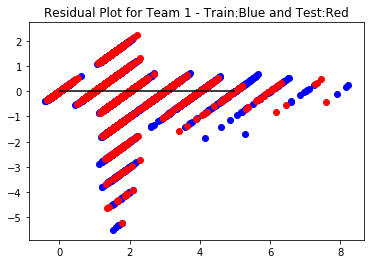

In [11]:
plt.scatter(team1Predict_train,np.subtract(team1Predict_train,team1Y_train.values),c='b')
plt.scatter(team1Predict_test,np.subtract(team1Predict_test,team1Y_test.values),c='r')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 1 - Train:Blue and Test:Red')

In [12]:
from sklearn.model_selection import train_test_split

team2X_train, team2X_test, team2Y_train, team2Y_test = train_test_split(noScoreDF, regDF.score2, random_state=5)

from sklearn.linear_model import LinearRegression
team2Reg = LinearRegression()
team2Reg.fit(team2X_train,team2Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
team2Predict_train = team2Reg.predict(team2X_train)
team2Predict_test = team2Reg.predict(team2X_test)

lfTrainTeam2MSE = round(np.mean(np.subtract(team2Y_train.values,team2Predict_train) ** 2),3)
lfTestTeam2MSE = round((np.mean(np.subtract(team2Y_test.values,team2Predict_test) ** 2)),3)

print(lfTrainTeam2MSE)
print(lfTestTeam2MSE)



0.508
0.5


Text(0.5,1,'Residual Plot for Team 2 - Train:Blue and Test:Red')

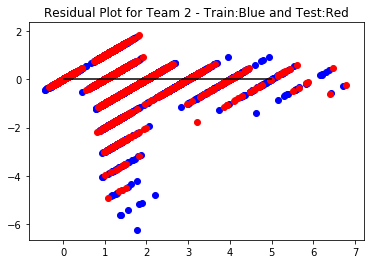

In [14]:
plt.scatter(team2Predict_train,np.subtract(team2Predict_train,team2Y_train.values),c='b')
plt.scatter(team2Predict_test,np.subtract(team2Predict_test,team2Y_test.values),c='r')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Team 2 - Train:Blue and Test:Red')

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rfTeam1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rfTeam1.fit(team1X_train,team1Y_train);

In [65]:
rfPredictTrainTeam1 = rfTeam1.predict(team1X_train)
# Calculate the Square errors
rfErrorTrainTeam1 = (rfPredictTrainTeam1 - team1Y_train)**2
# Print out the mean absolute error (mae)
rfTrainTeam1MSE =  round(np.mean(rfErrorTrainTeam1),3)
print('Mean Square Error Train:', rfTrainTeam1MSE)


# Use the forest's predict method on the test data
rfPredictTeam1 = rfTeam1.predict(team1X_test)
# Calculate the Square errors
rfErrorTeam1 = (rfPredictTeam1 - team1Y_test)**2
# Print out the mean absolute error (mae)
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),3)
print('Mean Square Error Test:', rfTestTeam1MSE)

Mean Square Error Train: 0.091
Mean Square Error Test: 0.62


In [25]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rfTeam2 = RandomForestRegressor(n_estimators = 100, random_state = 62)
# Train the model on training data
rfTeam2.fit(team2X_train,team2Y_train);

In [58]:
rfPredictTrainTeam2 = rfTeam2.predict(team2X_train)
# Calculate the Square errors
rfErrorTrainTeam2 = (rfPredictTrainTeam2 - team2Y_train)**2
# Print out the mean absolute error (mae)
rfTrainTeam2MSE =  round(np.mean(rfErrorTrainTeam2),3)
print('Mean Square Error Train:', rfTrainTeam2MSE)


# Use the forest's predict method on the test data
rfPredictTeam2 = rfTeam2.predict(team2X_test)
# Calculate the absolute errors
rfErrorTeam2 = (rfPredictTeam2 - team2Y_test) **2
# Print out the mean absolute error (mae)
rfTestTeam2MSE = round(np.mean(rfErrorTeam2),3)
print('Mean Square Error Test:', rfTestTeam2MSE)

Mean Square Error Train: 0.073
Mean Square Error Test: 0.515


In [34]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfTeam1.estimators_[50]
# Export the image to a dot file
export_graphviz(tree, out_file = r'C:\Users\kumar\OneDrive\Documents\Projects\SoccerSPI\reports\tree.dot', feature_names = list(noScoreDF.columns.values), rounded = True, precision = 1)
# Use dot file to create a graph


In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

(graph, ) = pydot.graph_from_dot_file(r'C:\Users\kumar\OneDrive\Documents\Projects\SoccerSPI\reports\tree.dot')
# Write graph to a png file
graph.write_png(r'C:\Users\kumar\OneDrive\Documents\Projects\SoccerSPI\reports\tree1.png')

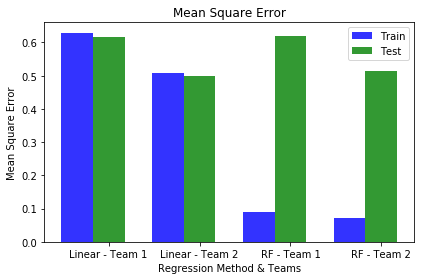

In [67]:
# data to plot
n_groups = 4
train_mse = (lfTrainTeam1MSE, lfTrainTeam2MSE,rfTrainTeam1MSE,rfTrainTeam2MSE)
test_mse = (lfTestTeam1MSE,lfTestTeam2MSE,rfTestTeam1MSE,rfTestTeam2MSE)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, train_mse, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Train')
 
rects2 = plt.bar(index + bar_width, test_mse, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Test')
 
plt.xlabel('Regression Method & Teams')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error')
plt.xticks(index + bar_width, ('Linear - Team 1', 'Linear - Team 2', 'RF - Team 1', 'RF - Team 2'))
plt.legend()
 
plt.tight_layout()